In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
from astroquery.jplhorizons import Horizons
from astropy.table import Table

Remember to install the package: pip install git+https://github.com/jrob93/nice_orbs

And install dependencies! (see nice_orbs_env.yml)

In [2]:
# If not pip installing add import path
import sys
import os
print(os.getcwd())
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

/Users/jrobinson/nice_orbs/tutorials


In [3]:
from nice_orbs.orb_class import BodyOrb
import nice_orbs.orb_funcs as orb_funcs

Create a blank body to add orbit values to

In [4]:
bod = BodyOrb()

Set some values manually. Note that by default nice_orbs accepts distances in units of semimajor axis, angles in radians. By default G=1 and M_sun=1 therefore time is in units of 1yr/2pi

In [5]:
bod.a = 2.5
bod.e = 0.1
bod.inc = np.radians(5)

In [6]:
bod.print_orb()

a=2.5,e=0.1,inc=0.08726646259971647,peri=None,node=None,f=None


An orbit can also be passed from a dictionary

In [7]:
orb_dict = {"a":2.5,
            "e":0.1,
            "inc":np.radians(5),
            "peri":np.radians(10),
            "node":np.radians(15)
           }

In [8]:
bod.load_dict(orb_dict)
bod.print_orb()

a=2.5,e=0.1,inc=0.08726646259971647,peri=0.17453292519943295,node=0.2617993877991494,f=None


Note that we have only passed the 5 elements required to describe the shape and orientation of the elliptical orbit in 3d space. Also we need to call calc_orb_vectors in order to find the unit vectors of this ellipse from the elements

In [9]:
bod.calc_orb_vectors()
bod.calc_values()

In [10]:
bod.ep,bod.eQ

(array([0.90647881, 0.42197999, 0.01513444]),
 array([-0.42164834,  0.90268799,  0.08583165]))

Now we can find the xyz positions that describe the elliptical orbit in space

In [11]:
df_pos = bod.planet_orbit()

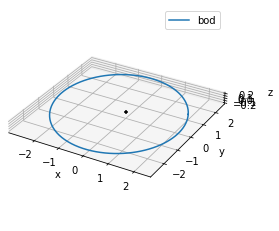

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(0,0,0,marker="+",c="k") # plot origin (sun)

ax.plot3D(df_pos["x"],df_pos["y"],df_pos["z"],label = "bod")

ax.set_box_aspect((np.ptp(df_pos["x"]), np.ptp(df_pos["y"]), np.ptp(df_pos["z"])))  # aspect ratio is 1:1:1 in data space

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

We can also calculate the positions of an object from elements such as true_anomaly

In [13]:
bod.f = np.radians(30)

In [14]:
bod.n

0.25298221281347033

In [15]:
df_rv = bod.pos_vel_from_orbit(bod.f)

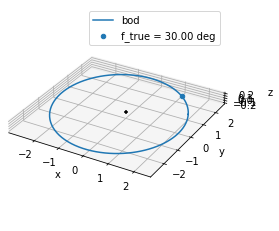

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(0,0,0,marker="+",c="k") # plot origin (sun)

ax.plot3D(df_pos["x"],df_pos["y"],df_pos["z"],label = "bod")
ax.scatter3D(df_rv["x"],df_rv["y"],df_rv["z"],label = "f_true = {:.2f} deg".format(np.degrees(bod.f)))

ax.set_box_aspect((np.ptp(df_pos["x"]), np.ptp(df_pos["y"]), np.ptp(df_pos["z"])))  # aspect ratio is 1:1:1 in data space

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

At time = 0 the object should be at its perihelion. Be wary of the time units, Kepler's second law (a^3 = T^2) gives the period from the semimajor axis in years (remember that 1 year = 2pi in these default units).

In [17]:
t_list = np.linspace(0,2*np.pi*(bod.a**(3.0/2.0)))

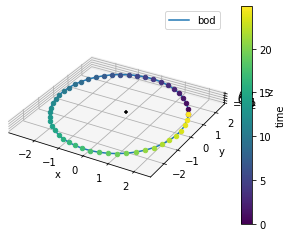

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(0,0,0,marker="+",c="k") # plot origin (sun)

ax.plot3D(df_pos["x"],df_pos["y"],df_pos["z"],label = "bod")

for t in t_list:
    bod.f = orb_funcs.f_from_t(t,bod.e,bod.n,0,0)
    df_rv = bod.pos_vel_from_orbit(bod.f)
    s1 = ax.scatter3D(df_rv["x"],df_rv["y"],df_rv["z"],c=t,vmin = np.amin(t_list), vmax = np.amax(t_list))

cbar1=fig.colorbar(s1)
cbar1.set_label("time")
ax.set_box_aspect((np.ptp(df_pos["x"]), np.ptp(df_pos["y"]), np.ptp(df_pos["z"])))  # aspect ratio is 1:1:1 in data space

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()